In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram
import sys

In [2]:
number = input("Enter your secret number: ")

Enter your secret number: 11001


In [3]:
# apply cx-gate if secret number bit is '1' (read from right to left)
# should reverse the number
def cx_gate(length):
    for index, bit in enumerate(reversed(number)):
        if bit == '1':
            circuit.cx(index, length)
        elif bit > '1':
            print("Invalid input!")
            sys.exit()
    circuit.barrier()

In [4]:
def h_gate(length):
    circuit.h(range(length))

In [5]:
def measure_bit(length):
    circuit.measure(range(length), range(length))

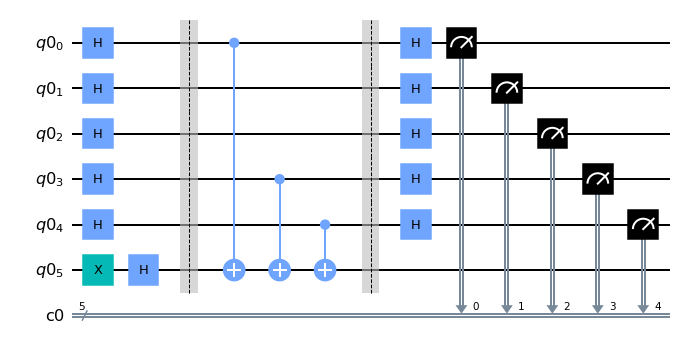

In [6]:
number_length = len(number)

qr = QuantumRegister(number_length + 1)
cr = ClassicalRegister(number_length)
circuit = QuantumCircuit(qr, cr)


# add hadamard from Q0 to Qn-1
h_gate(number_length)

# add x-gate and h-gate to Qn
circuit.x(number_length)
circuit.h(number_length)
circuit.barrier()

cx_gate(number_length)

h_gate(number_length)

measure_bit(number_length)
circuit.draw('mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts()
print(counts)

{'11001': 1024}
